### Imports

In [1]:
import sys
sys.path.insert(0, "..")
from utils.dataset_utils import OriginalDataset, plot_image_array, plot_delta

# Standard Downloads
import matplotlib.pyplot as plt

### Load Dataset

In [2]:
original_dataset = OriginalDataset('../datasets/droid_100_sample_pictures')
len_ = (original_dataset.__len__())
print(len_)

168


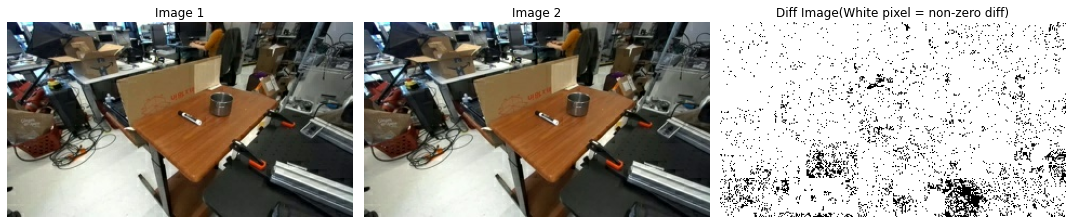

In [3]:
image1 = original_dataset[0]
image2 = original_dataset[1]

non_zero_diff_count, image3 = plot_delta(image2 - image1)
# Create a figure to hold the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each image
axes[0].imshow(image1)
axes[0].set_title('Image 1')
axes[0].axis('off')  # Turn off axis labels

axes[1].imshow(image2)
axes[1].set_title('Image 2')
axes[1].axis('off')

axes[2].imshow(image3, cmap="gray")
axes[2].set_title('Diff Image(White pixel = non-zero diff)')
axes[2].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

Traversing strategy:

Row by Row, Left to Right

In [4]:
non_zero_diff_count

52461

### Original Image Storage

In [5]:
num_pixels = image1.shape[0]* image1.shape[1] * image1.shape[2]
bit_size = num_pixels * 8
Mb_size = bit_size / (10 ** 6)
print(f"Original Image Storage({bit_size} / (10 ** 6) = ", Mb_size)

Original Image Storage(1382400 / (10 ** 6) =  1.3824


### Compressed Image Storage

In [6]:
# a single bit for every pixel location, where 1 represents there is a diff
bit_map_storage = image1.shape[0]* image1.shape[1]
sparse_representation_bit_size = non_zero_diff_count * 3 * 8

total_mb_size = (bit_map_storage + sparse_representation_bit_size) / (10 ** 6)
print(f"Compressed Image Storage({bit_map_storage} + {sparse_representation_bit_size} / (10 ** 6)) = ", total_mb_size)

Compressed Image Storage(57600 + 1259064 / (10 ** 6)) =  1.316664
